# Transformada de Fourier

Renato Naville Watanabe

## Preparação do ambiente

In [2]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl

In [3]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from sympy.plotting import PlotGrid
%matplotlib widget

## Motivação



Vamos começar analisando a série de Fourier do sinal mostrado abaixo:

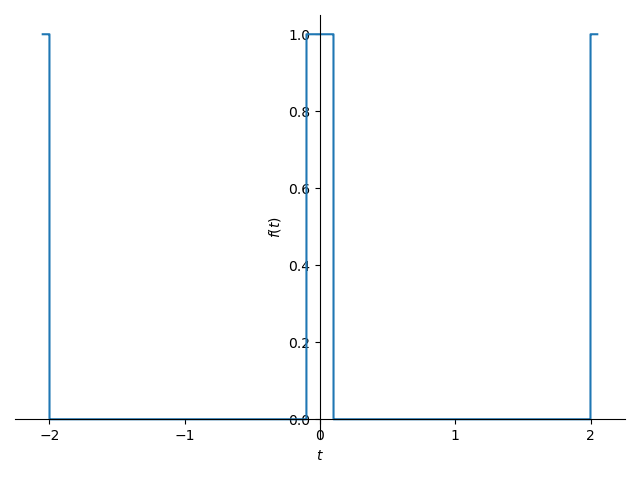

In [3]:
t = sym.symbols('t')
x = sym.Heaviside(t+0.1) - sym.Heaviside(t-0.1) + sym.Heaviside(t-2) + sym.Heaviside(t+2.1) - sym.Heaviside(t+2)
y = sym.symbols('y')
p1 = sym.plot(x, (t, -2.05, 2.05))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([-2.1, -0.1, 0.1, 2.1])
ax.set_xticklabels([r'$-T$', r'-0.1', r'0.1', r'$T$'])
ax.set_yticks([1])
ax.set_yticklabels(['1'])
fig.canvas.draw_idle()

Ele é um pulso que tem 0.2 segundos de duração no valor 1 e se repete a cada T segundos.

A série de Fourier desse sinal é:

$a_n = \frac{1}{T}\int_{-0.1}^{0.1}e^{-jn\frac{2\pi}{T}t}\,dt = \frac{1}{T}\left.\frac{e^{-jn\frac{2\pi}{T}t}}{-jn\frac{2\pi}{T}}\right|_{t=-0.1}^{0.1} = \frac{e^{jn\frac{0,2\pi}{T}}-e^{-jn\frac{0,2\pi}{T}}}{jn2\pi} = \frac{\mathrm{sen}(n\frac{0,2\pi}{T})}{n\pi}=\frac{2}{T}\frac{\mathrm{sen}(n\frac{0,2\pi}{T})}{\frac{2n\pi}{T}}$

A frequência angular correspondente a cada $n$ é $\omega = n\frac{2\pi}{T}$. Então, podemos reescrever $a_n$ como:

$a_n = \left.\frac{2}{T}\frac{\mathrm{sen}(0,1\omega)}{\omega}\right|_{\omega=n\omega_0}$

Em que $\omega_0 = \frac{2\pi}{T}$. Perceba que se aumentarmos $T$, a frequência fundamental $\omega_0$ diminui. Podemos fazer o gráfico dos coeficientes da série de Fourier para diferentes valores de $T$. Abaixo são mostrados os gráficos de $Ta_n$ para diferentes valores de $T$.

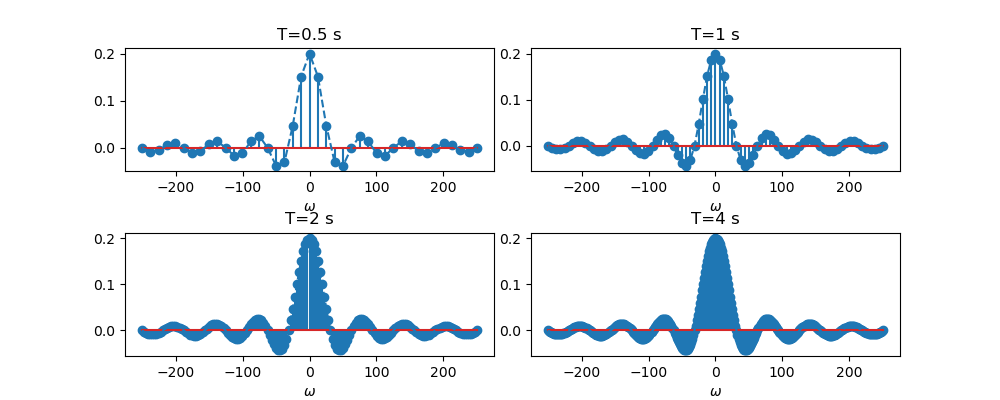

In [4]:
T = [0.5, 1, 2, 4]

p = dict()
plt.figure(figsize=(10,4))
T1=0.1
for i in range(len(T)):
    plt.subplot(2,2, i+1)
    k = np.arange(-20*2**(i), 20*2**(i)+1)
    omega = 2*np.pi/T[i]*k
    f = 0.2*np.ones(len(omega))
    f[k!=0] = 2*np.sin(omega[k!=0]*T1)/(omega[k!=0])
    plt.stem(omega, f)
    plt.plot(omega, f, '--')
    plt.xlabel(r'$\omega$')
    plt.title('T='+str(T[i])+' s')

plt.subplots_adjust(hspace=0.5, wspace=0.1)
plt.show()



O gráfico dos coeficientes segue a mesma envoltória, mas os coeficientes se aproximam uns dos outros conforme o valor de $T$ aumenta.

O que Joseph Fourier tentou responder é o que aconteceria se $T$ tendesse ao infinito. Nesse caso, poderíamos representar sinais não periódicos (um sinal não periódico é um sinal com período infinito). Vendo os gráficos acima, podemos intuir que se $T$ for para o infinito, a distância entre cada coeficiente será infinitesimal. Dessa intuição que surgiu a Transformada de Fourier.

## Definição


Com isso, a definição da Transformada de Fourier é:

$X(j\omega) = \int_{-\infty}^{\infty}x(t)e^{-j\omega t}\,dt$


A transformada de Fourier é indicada pelo operador $\mathcal{F}$.

$\mathcal{F}(x(t)) = \int_{-\infty}^{\infty}x(t)e^{-j\omega t}\,dt $


A transformada de Fourier de um sinal é conhecida como o **espectro** do sinal.

Diferentemente da série de Fourier, é possível calcular a Transformada de Fourier para qualquer sinal:

---

### Exemplo 1

Vamos calcular a transformada de Fourier de:

$x(t) = e^{-2t}u(t)$

$X(j\omega) = \int_{-\infty}^{\infty}e^{-2t}u(t)e^{-j\omega t}\,dt = \int_{0}^{\infty}e^{-(2+j\omega)t}\,dt = \left.\frac{e^{-(2+j\omega)t}}{-(2+j\omega)}\right|_{t=0}^\infty = \frac{0-1}{-(2+j\omega)} =  \frac{1}{2+j\omega}$

O módulo de $X(j\omega)$ é:

$|X(j\omega)| = \frac{1}{\sqrt{4+\omega^2}}$

e a fase é:

$\angle{X(j\omega)} = 0 - \arctan(\frac{\omega}{2}) = \arctan(-\frac{\omega}{2}) $

Podemos fazer o gráfico do módulo e da fase de $X(j\omega)$.

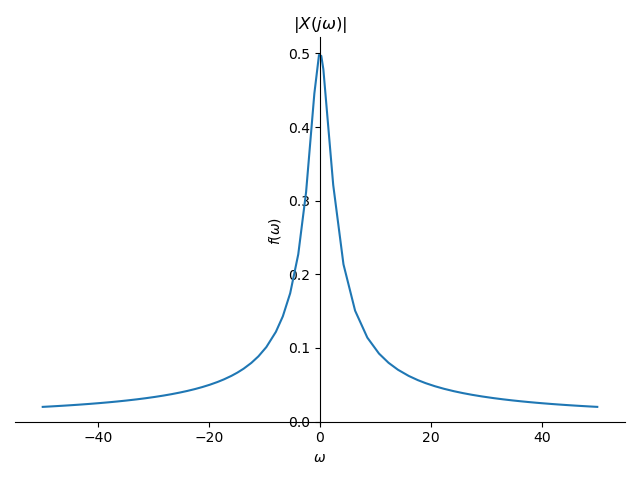

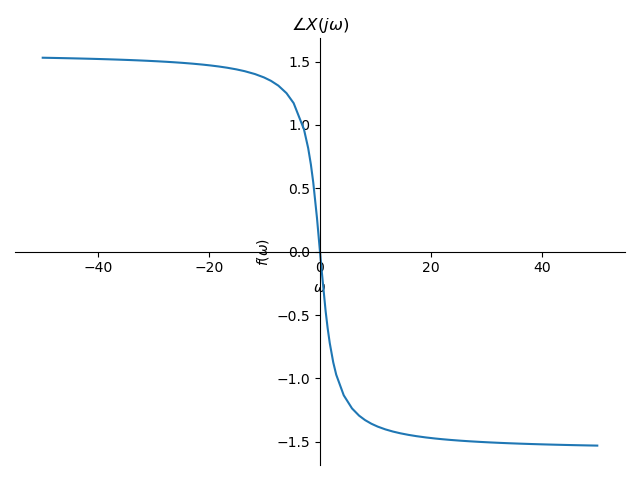

In [5]:
omega = sym.symbols('\omega')
X = 1/(2+sym.I*omega)
sym.plot(sym.Abs(X), (omega, -50, 50), title=r'$|X(j\omega)|$')
sym.plot(sym.arg(X), (omega, -50, 50), title=r'$\angle{X(j\omega)}$')

---

---

### Exemplo 2

Agora vamos calcular a transformada de Fourier de:

$x(t) = \delta(t-t_0)$

A transformada de Fourier é:


$X(j\omega) = \int_{-\infty}^\infty\delta(t-t_0)e^{-j\omega t}\,dt =  \int_{-\infty}^\infty\delta(t-t_0)e^{-j\omega t_0}\,dt =  e^{-j\omega t_0}\int_{-\infty}^\infty\delta(t-t_0)\,dt =  e^{-j\omega t_0}$

O módulo e fase de $X(j\omega)$ são:

$|X(j\omega)| = 1$

$\angle{X(j\omega)} = -\omega t_0$





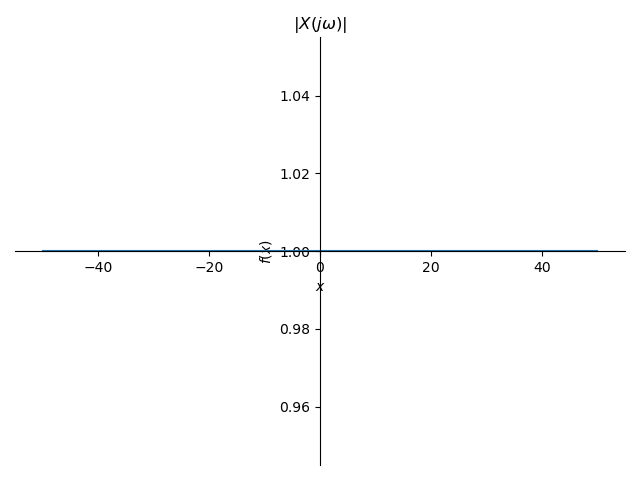

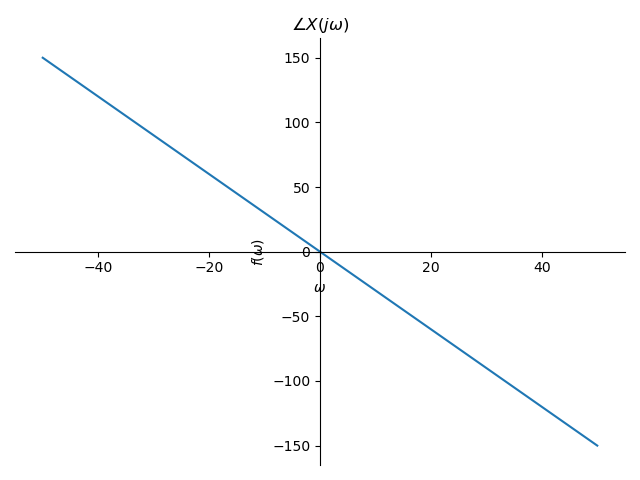

In [6]:
omega = sym.symbols('\omega')
t0 = 3
sym.plot(1+0*omega, (omega, -50, 50), title=r'$|X(j\omega)|$')
plt.ylim(0, 1.2)
sym.plot(-omega*t0, (omega, -50, 50), title=r'$\angle{X(j\omega)}$')

---

---

### Exemplo 3

Vamos calcular a transformada de Fourier do sinal com o gráfico abaixo:

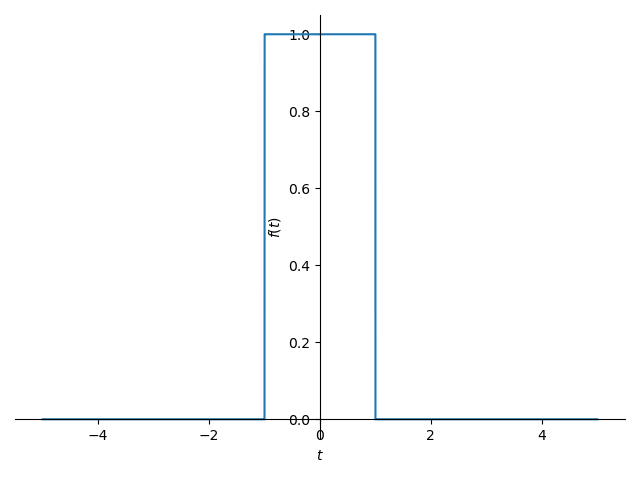

In [7]:
T = 1
t = sym.symbols('t')
x = sym.Piecewise((1, (t>-T) & (t<T)),
                  (0, True))
p1 = sym.plot(x, (t, -5,5))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([-1, 1])
ax.set_xticklabels([r'$-T$', r'$T$'])
ax.set_yticks([1])
ax.set_yticklabels(['A'])
fig.canvas.draw_idle()

A transformada de Fourier desse sinal é:

$X(j\omega) = \int_{-\infty}^{\infty} x(t)e^{-j\omega t}\,dt =  \int_{-T}^{T} Ae^{-j\omega t}\,dt = \left.A\frac{e^{-j\omega t}}{-j\omega}\right|_{t=-T}^{T} = A\frac{(e^{-j\omega T}-e^{j\omega T})}{-j\omega} = 2A\frac{\mathrm{sen}(\omega T)}{\omega}$

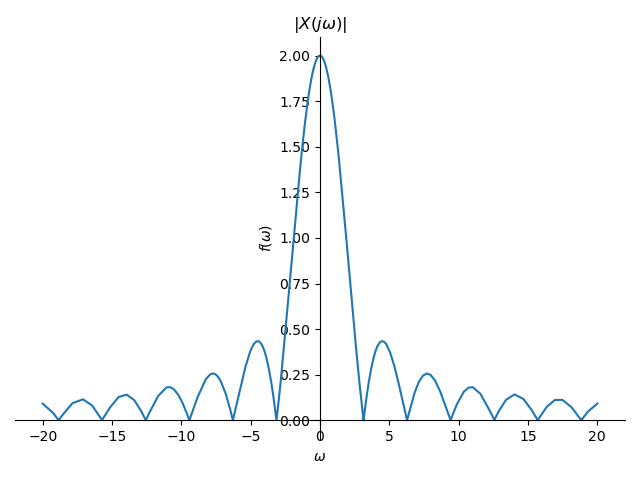

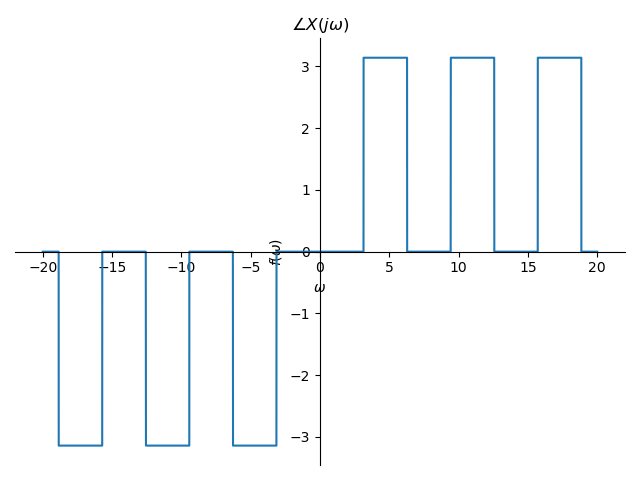

In [8]:
omega = sym.symbols('\omega')
T = 1
A = 1
p1 = sym.plot(2*A*sym.Abs(sym.sin(T*omega)/omega), (omega, -20, 20),  title=r'$|X(j\omega)|$')
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([-5*np.pi/T, -4*np.pi/T, -3*np.pi/T, -2*np.pi/T, -np.pi/T, 
               np.pi/T, 2*np.pi/T, 3*np.pi/T, 4*np.pi/T, 5*np.pi/T])
ax.set_xticklabels([r'$-5\frac{\pi}{T}$', r'$-4\frac{\pi}{T}$', r'$-3\frac{\pi}{T}$', 
                    r'$-2\frac{\pi}{T}$', r'$-\frac{\pi}{T}$', r'$\frac{\pi}{T}$', r'$2\frac{\pi}{T}$', 
                    r'$3\frac{\pi}{T}$', r'$4\frac{\pi}{T}$', r'$5\frac{\pi}{T}$'])
fig.canvas.draw_idle()
p2 = sym.plot(sym.arg(sym.sin(T*omega)/omega), (omega, -20, 20), title=r'$\angle{X(j\omega)}$')
fig2 = p2._backend.fig
ax2 = p2._backend.ax[0]
ax2.set_xticks([-5*np.pi/T, -4*np.pi/T, -3*np.pi/T, -2*np.pi/T, -np.pi/T, 
               np.pi/T, 2*np.pi/T, 3*np.pi/T, 4*np.pi/T, 5*np.pi/T])
ax2.set_xticklabels([r'$-5\frac{\pi}{T}$', r'$-4\frac{\pi}{T}$', r'$-3\frac{\pi}{T}$', 
                    r'$-2\frac{\pi}{T}$', r'$-\frac{\pi}{T}$', r'$\frac{\pi}{T}$', r'$2\frac{\pi}{T}$', 
                    r'$3\frac{\pi}{T}$', r'$4\frac{\pi}{T}$', r'$5\frac{\pi}{T}$'])
fig2.canvas.draw_idle()


## O sinal sinc

Sinais como os que apareceram no exemplo anterior são muito frequentes na análise de Fourier. Por isso, definimos um novo sinal: o **sinc**:

$\mathrm{sinc}(\theta) = \frac{sen(\pi\theta)}{\pi \theta}$

Então, no exemplo anterior, a transformada de Fourier pode ser expressa como:

$X(j\omega) = 2A\frac{\mathrm{sen}(T\omega)}{\omega} = 2T\frac{\mathrm{sen}(\pi\frac{T\omega}{\pi})}{\pi\frac{T\omega}{\pi}} = 2AT\mathrm{sinc}(\frac{T\omega}{\pi})$

Abaixo está o gráfico de $\mathrm{sinc}(Tt)$.

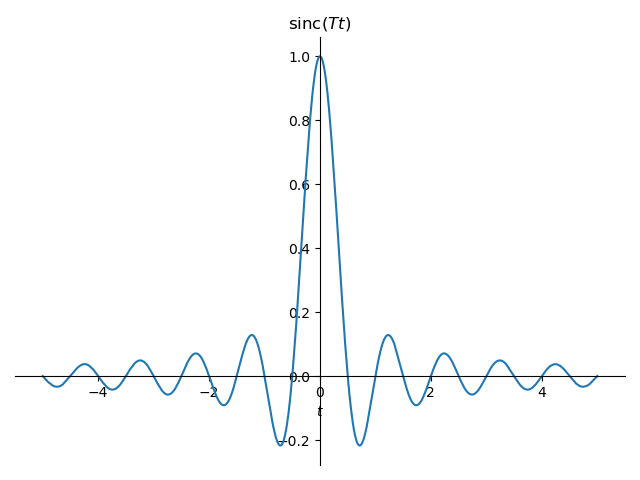

In [9]:
T = 2

t = sym.symbols('t')
x = sym.sin(np.pi*T*t)/(np.pi*T*t)
p1 = sym.plot(x, (t, -5, 5), title=r'$\mathrm{sinc}(Tt)$', ylabel='')
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([-5/T, -4/T, -3/T, -2/T, -1/T, 1/T, 2/T, 3/T, 4/T, 5/T])
ax.set_xticklabels([r'$-\frac{5}{T}$', r'$-\frac{4}{T}$', r'$-\frac{3}{T}$', 
                    r'$-2\frac{2}{T}$', r'$-\frac{1}{T}$', r'$\frac{1}{T}$', 
                    r'$\frac{2}{T}$', r'$\frac{3}{T}$', r'$\frac{4}{T}$', r'$\frac{5}{T}$'])
fig.canvas.draw_idle()

## O sinal rect

Outro sinal que aparece com frequência é o pulso retangular. Então, definimos o pulso retangular como:

$\mathrm{rect}(t) = \left\{\begin{array}{cc}1 &, -0.5 < t < 0.5\\0&, \text{c.c} \end{array}\right.$

A função acima é um pulso retangular de amplitude 1 e duração 1, centrada em 0.

Abaixo está o gráfico de $A\mathrm{rect}\left(\frac{t}{T}\right)$

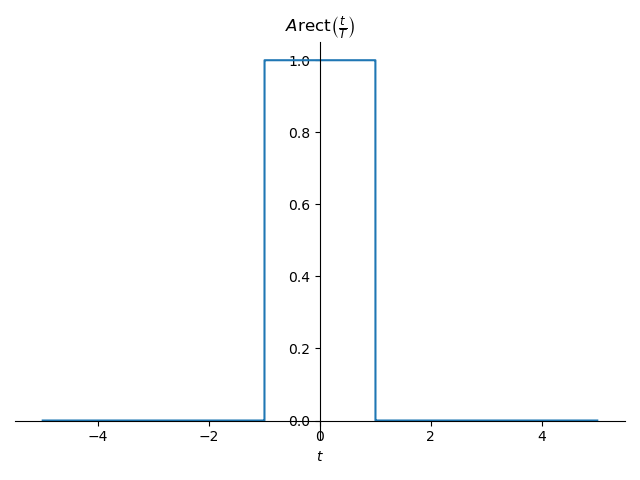

In [10]:
T = 1
t = sym.symbols('t')
x = sym.Piecewise((1, (t>-1) & (t<1)),
                  (0, True))
p1 = sym.plot(x, (t, -5, 5), title=r'$A\mathrm{rect}\left(\frac{t}{T}\right)$', ylabel='')
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([-T, T])
ax.set_xticklabels([r'$-\frac{T}{2}$', r'$\frac{T}{2}$'])
ax.set_yticks([1])
ax.set_yticklabels([r'$A$'])
fig.canvas.draw_idle()

Então, no exemplo anterior, o sinal $x(t)$ fica:

$x(t) = \mathrm{rect}\left(\frac{t}{2T}\right)$

---

## Transformada de Fourier inversa

A partir da expressão de uma transformada de Fourier, podemos voltar ao sinal que deu origem àquela transformada pela seguinte expressão:

$\mathcal{F}^{-1}(X(j\omega)) = \frac{1}{2\pi}\int_{-\infty}^\infty X(j\omega)e^{j\omega t}\,d\omega$




---

### Exemplo 4

Vamos obter o sinal $x(t)$ que deu origem a:

$X(j\omega) = 2\pi\delta(\omega)$

Então,

$x(t) = \frac{1}{2\pi}\int_{-\infty}^\infty 2\pi\delta(\omega)e^{j\omega t}\,d\omega = \int_{-\infty}^\infty \delta(\omega)\,d\omega  = 1$


Ou seja, a transformada de Fourier do sinal constante é um impulso em $\omega=0$.

---

Seria muito difícil fazer a transformada de Fourier do sinal constante. É mais fácil fazer a operação inversa. 

## Linearidade da transformada de Fourier

A transformada de Fourier é uma operação linear. Isso significa que se sabemos a transformada de Fourier de dois sinais, uma combinação linear desses dois sinais terá uma transformada de Fourier igual à mesma combinação linear das duas transformadas.

$\mathcal{F}(x_1(t)) = X_1(j\omega)$ e $\mathcal{F}(x_2(t)) = X_2(j\omega)$

então:

$\boxed{\mathcal{\mathcal{F}}(ax_1(t)+bx_2(t)) = aX_1(j\omega)+bX_2(j\omega)}$

## Propriedade da dualidade frequência-tempo

Uma propriedade que facilita muito a obtenção da transformada de Fourier de um sinal é a propriedade da dualidade frequência-tempo. Essa propriedade diz que se a transformada de um sinal $x(t)$ é conhecida:

$\mathcal{F}(x(t)) = X(j\omega)$

então:

$\boxed{\mathcal{F}(X(t)) = 2\pi x(-j\omega)}$

-**Prova** 

$x(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty}X(j\omega)e^{j\omega t}\,d\omega$

Trocando $\omega$ por $t$ e $t$ por $-\omega$ na última expressão, temos:

$x(-j\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty}X(t)e^{-jt \omega}\,dt$

Chegamos a:

$2\pi x(-j\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty}X(t)e^{-jt \omega}\,dt$

---

### Exemplo 5

Vamos calcular a transformada de Fourier de

$x(t) = \cos(3t)$

Podemos reescrever $x(t)$ como:

$x(t) = \frac{e^{j3t}+e^{-j3t}}{2}$


Pela propridade da linearidade:

$X(j\omega) = \frac{1}{2}\mathcal{F}(e^{j3t})+ \frac{1}{2}\mathcal{F}(e^{-j3t})$

No exemplo 2, vimos que $\mathcal{F}(\delta(t-t_0)) = e^{-j\omega t_0}$. Então, pela propriedade da dualidade:

$\mathcal{F}(e^{j3t}) = 2\pi\delta(-\omega+3)$

e 

$\mathcal{F}(e^{-j3t}) = 2\pi\delta(-\omega-3)$

Então

$X(j\omega) = \pi\delta(-\omega+3) + \pi\delta(-\omega-3)$

O gráfico o espectro de $x(t)$ está abaixo:

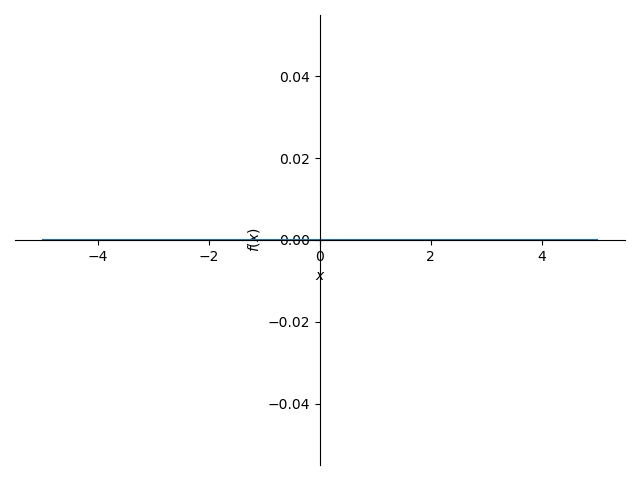

In [11]:
t = sym.symbols('t')
x = sym.Piecewise((0, True))
p1 = sym.plot(x, (t, -5, 5))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_ylabel(r'$X(j\omega)$')
ax.set_xlabel(r'$\omega$')
ax.arrow(3,0,0,np.pi-0.1, width=0.03, head_width = 0.2, head_length=0.1)
ax.arrow(-3,0,0,np.pi-0.1, width=0.03, head_width = 0.2, head_length=0.1)
plt.ylim(-0.1,4)
fig.canvas.draw_idle()

---

## Outras propriedades da transformada de Fourier



### Convolução

Se $\mathcal{F}(x_1(t)) = X_1(j\omega)$ e$\mathcal{F}(x_2(t)) = X_2(j\omega)$, 

então

$\boxed{\mathcal{F}(x_1(t)*x_2(t)) = X_1(j\omega)X_2(j\omega)}$


### Multiplicação

Se $\mathcal{F}(x_1(t)) = X_1(j\omega)$ e$\mathcal{F}(x_2(t)) = X_2(j\omega)$, 

então:

$\boxed{\mathcal{F}(x_1(t)x_2(t)) = \frac{1}{2\pi}X_1(j\omega)*X_2(j\omega)}$

### Atraso

Se $\mathcal{F}(x(t)) = X(j\omega)$, então

$\boxed{\mathcal{F}(x(t-t_0))} = X(j\omega)e^{-j\omega t_0}$


### Derivada

Se $\mathcal{F}(x(t)) = X(j\omega)$, então

$\boxed{\mathcal{F}\left(\frac{dx}{dt}\right)=j\omega X(j\omega)} $

### Integral

Se $\mathcal{F}(x(t)) = X(j\omega)$, então

$\boxed{\mathcal{F}\left(\int_{-\infty}^tx(\tau\,d\tau)\right)=\frac{1}{j\omega }X(j\omega)  + \pi X(0)\delta(\omega)}$

A prova dessa propriedade vai além dos propósitos desse curso. Para ver a prova dessa propriedade, ver *'The Fourier Integral and its applications'*.

### Escala de tempo

Se $\mathcal{F}(x(t)) = X(j\omega)$, então

$\boxed{\mathcal{F}\left(x(at)\right)=\frac{1}{|a|}X\left(j\frac{\omega}{a}\right)}$

### Derivada do espectro

Se $\mathcal{F}(x(t)) = X(j\omega)$, então

$\boxed{\mathcal{F}\left(tx(t)\right)=j\frac{dX\left(j\omega\right)}{d\omega}}$


As provas dessas propriedades, com exceção da integral, fica como exercício.

---

### Exemplo 6

Vamos calcular o espectro de:

$x(t) = A\mathrm{sinc}(Tt)$

Nós sabemos, do exemplo 3, que o sinal que tem a seguinte transformada de Fourier:

$X_1(j\omega) = 2AT\mathrm{sinc}(\frac{T\omega}{\pi})$

é:

$x_1(t) = A\mathrm{rect}\left(\frac{t}{2T}\right)$

Pela propriedade da dualidade, a transformada de Fourier de 

$x_2(t) = 2AT\mathrm{sinc}\left(\frac{Tt}{\pi}\right)$

é

$X_2(j\omega) = 2\pi A\mathrm{rect}\left(-\frac{\omega}{2T}\right) = 2\pi A\mathrm{rect}\left(\frac{\omega}{2T}\right)$

Pela propriedade da linearidade, a transformada de Fourier de:

$x_3(t) = A\mathrm{sinc}(\frac{Tt}{\pi})$

é

$X_3(j\omega) = \frac{\pi A}{T}\mathrm{rect}\left(\frac{\omega}{2T}\right)$

Então, pela propriedade da escala no tempo, a transformada de Fourier de:

$x(t) = A\mathrm{sinc}(Tt)$

é

$X(j\omega) = \frac{A}{T}\mathrm{rect}\left(\frac{\omega}{2T\pi}\right)$

Abaixo são mostrados os gráficos de $x(t)$, $X(j\omega)$, $x_1(t)$ e $X_1(j\omega)$, para $A = 1$ e $T = 1$.

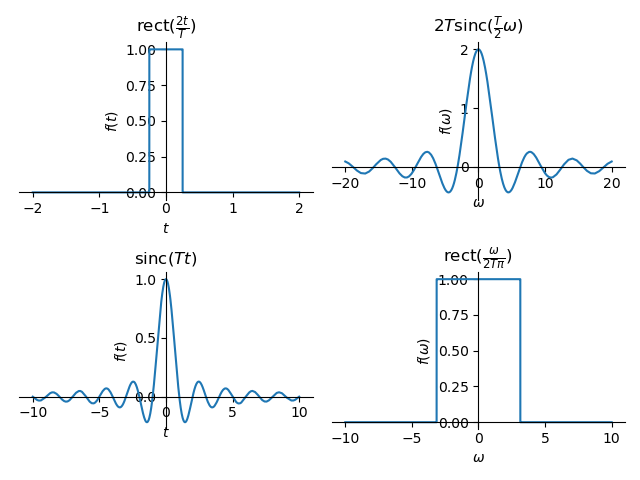

In [12]:
A = 1
T = 1
t, omega = sym.symbols('t, \omega')
p1 = sym.plot(sym.Heaviside(t+T/4)-A*sym.Heaviside(t-T/4), (t, -2,2), show=False, title=r'$\mathrm{rect}(\frac{2t}{T})$')
p2 = sym.plot(2*T*sym.sin(T*omega)/(T*omega), (omega, -20,20), show=False, title=r'$2T\mathrm{sinc}(\frac{T}{2}\omega)$')
p3 = sym.plot(sym.sin(np.pi*T*t)/(np.pi*T*t), (t, -10,10), show=False, title=r'$\mathrm{sinc}(Tt)$')
p4 = sym.plot(1/T*sym.Heaviside(omega+2*T*sym.pi/2)-1/T*sym.Heaviside(omega-2*T*sym.pi/2), (omega, -10,10), show=False, title=r'$\mathrm{rect}(\frac{\omega}{2T\pi})$')

PlotGrid(2,2,p1,p2,p3,p4)

## Tabela  de transformada de Fourier de alguns sinais

|$$\bf{x(t)}$$                        | $$\bf{X(j\omega)}$$                                                          |
|-------------------------------------|------------------------------------------------------------------------|
|$\delta(t)$                          | 1                                                                      |
|$\delta(t-t_0)$                      | $e^{-j\omega t_0}$                                                     |
|$u(t)$                               | $\frac{1}{j\omega} + \pi\delta(\omega)$                                |
|$u(t-t_0)$                           | $\frac{e^{-j\omega t_0}}{j\omega} + \pi\delta(\omega)$                 |    
|$e^{-\lambda t}u(t)$, com $\lambda>0$    | $\frac{1}{j\omega+\lambda}$                                            |
|$e^{\lambda t}u(-t)$ , com $\lambda>0$   | $\frac{1}{-j\omega+\lambda}$                                            |
|$\cos(b t)$                          |$\pi\delta(\omega-b)+\pi\delta(\omega+b)$                               |
|$\mathrm{sen}(b t)$                  |$j\pi\delta(\omega+b)-j\pi\delta(\omega-b)$                             |
|1                                    | $2\pi\delta(\omega)$                                                   |
|$\mathrm{sinc}(Tt)$                | $\frac{1}{T}\mathrm{rect}\left(\frac{\omega}{2T\pi}\right)$                        |
|$\mathrm{rect}\left(\frac{t}{T}\right)$| $T\mathrm{sinc}\left(\frac{T\omega}{2\pi}\right)$                        |
|$e^{-\lambda\left|t\right|}$, com $\lambda>0$| $\frac{2\lambda}{\lambda^2+\omega^2}$                        |
|$e^{j\omega_0 n}$| $\pi\delta(\omega-\omega_0)$                        |



## Transformada de Fourier de sinais periódicos

Como já visto anteriormente, um sinal periódico, com frequência fundamental $\omega_0$, pode ser escrito como uma série de Fourier:

$x(t) = \displaystyle\sum_{k=-\infty}^\infty c_ke^{jk\omega_0 t}$

Como já visto anteriormente, a transformada de Fourier de $e^{jk\omega_0 t}$ é $\pi\delta(\omega-k\omega_0)$. Então, a transformada de Fourier de um sinal periódico é um trem de impulsos com áreas correspondentes aos coeficientes da série de Fourier:

$X(j\omega) = \displaystyle\sum_{k=-\infty}^\infty c_k\pi\delta(\omega-k\omega_0)$






---

### Exemplo 7

Vamos calcular a transformada de Fourier da onda quadrada vista abaixo:





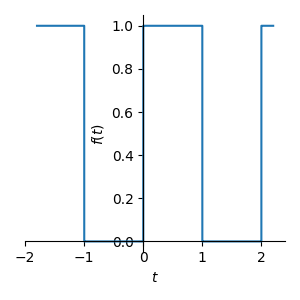

In [5]:
t = sym.symbols('t')
x = sym.Piecewise((1.0, (t>0)&(t<1)),
                  (1.0, (t>-2)&(t<-1)),
                  (1.0, (t>2)&(t<3)),
                  (0, True))
sym.plot(x, (t, -1.8,2.2), size=(3,3));

Como já visto anteriormente, a série de Fourier desse sinal é:

$c_n = \frac{e^{-jn\frac{\pi}{2}}}{n\pi}\mathrm{sen}\left(n\frac{\pi}{2}\right)$

e $c_0 = 0.5$

e $\omega_0 = \pi$ rad/s.

Então, a transformada de Fourier desse sinal é:

$X(j\omega) = \pi\delta(\omega)+\displaystyle\sum_{k=1}^{\infty} \frac{e^{-jn\frac{\pi}{2}}}{n}\mathrm{sen}\left(n\frac{\pi}{2}\right)\delta(\omega-n\pi) + \frac{e^{jn\frac{\pi}{2}}}{n}\mathrm{sen}\left(n\frac{\pi}{2}\right)\delta(\omega+n\pi)$

O gráfico do módulo e da fase do espectro do sinal está mostrado abaixo:

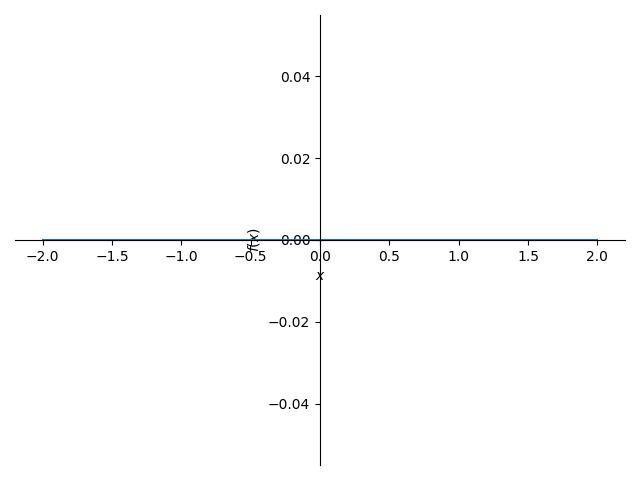

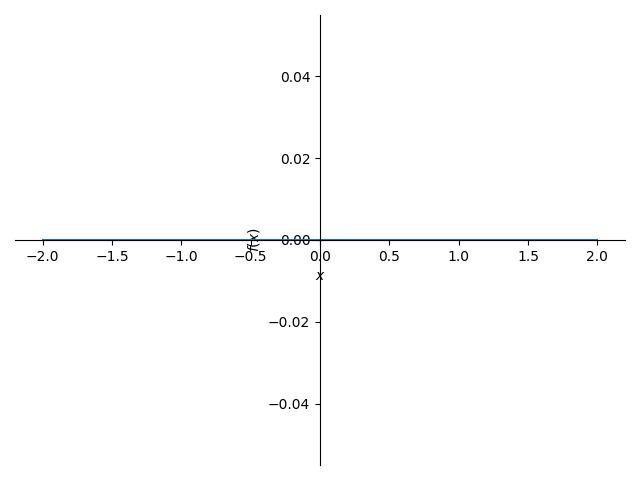

In [11]:
omega = sym.symbols('\omega')
x = sym.Piecewise((0, True))
y = sym.symbols('y')

p1 = sym.plot(x, (t, -2, 2))
fig = p1._backend.fig
ax = p1._backend.ax[0]
p2 = sym.plot(x, (t, -2, 2))
fig = p2._backend.fig
ax2 = p2._backend.ax[0]

ax.set_ylabel(r'$|X(j\omega)|$')
ax.set_xlabel(r'$\omega$')
ax2.set_ylabel(r'$\angle{X(j\omega)}$')
ax2.set_xlabel(r'$\omega$')

for i in range(-10,11):
    if i == 0:
        ax.arrow(i,0,0,np.pi-0.1, width=0.2, head_width=0.7, head_length=0.1)
    else:
        if np.abs(np.sin(i*np.pi/2)/i/np.pi) > 0.01:
            ax.arrow(i*np.pi,0,0,np.abs(np.sin(i*np.pi/2)/i), width=0.03, head_width = 0.2, head_length=0.1*np.abs(np.sin(i*np.pi/2)/i/np.pi))
            ax2.arrow(i*np.pi,0,0,(-i*np.pi/2*(np.sin(i*np.pi/2)/i)+np.pi)%(2*np.pi)-np.pi, width=0.03, head_width = 0, head_length=0)
 
plt.ylim(-4,4)
fig.canvas.draw_idle()


---


---

### Exemplo 8

Vamos agora encontrar o espectro do sinal

$r(t) = \mathrm{sinc}(t)$

multiplicado por:

$p(t) = \cos(2\pi 3t)$

Ou seja:

$x(t) = \mathrm{sinc}(t)\cos(2\pi 5t)$



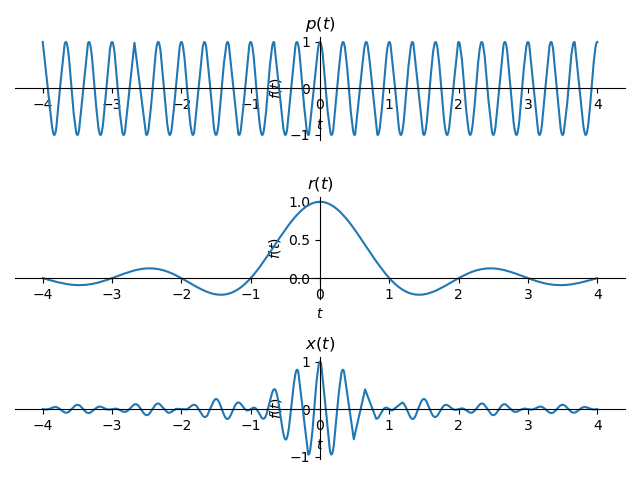

In [15]:
p1 = sym.plot(sym.cos(2*sym.pi*3*t), (t, -4,4), size=(3,3), title=r'$p(t)$',show=False);


p2 = sym.plot(sym.sin(np.pi*t)/(np.pi*t), (t, -4,4), size=(3,3), title=r'$r(t)$', show=False);
p3 = sym.plot(sym.sin(np.pi*t)/(np.pi*t)*sym.cos(2*sym.pi*3*t), (t, -4,4), size=(3,3), title=r'$x(t)$', nb_of_points= 1000, show=False);

PlotGrid(3,1, p1,p2,p3, )


Nós já conhecemos o espectro dos dois sinais:

$R(j\omega) = \mathrm{rect}\left(\frac{2\omega}{\pi}\right)$

e

$P(j\omega) = \pi\delta(\omega-2\pi 5) + \pi\delta(\omega+2\pi 5)$

A transformada de Fourier da multiplicação de dois sinais é:

$X(j\omega) = 2\pi R(j\omega)*P(j\omega) = 2\pi \int_{-\infty}^\infty R(jw)P(j(\omega-w)) \,dw = 2\pi \int_{-\infty}^\infty \mathrm{rect}\left(\frac{2w}{\pi}\right)(\pi\delta(\omega-w-2\pi 5) + \pi\delta(\omega-w+2\pi 5)) \,dw$ 

$X(j\omega) = 2\pi \int_{-\infty}^\infty \mathrm{rect}\left(\frac{2w}{\pi}\right)\pi\delta(\omega-w-2\pi 5) + \mathrm{rect}\left(\frac{2w}{\pi}\right)\pi\delta(\omega-w+2\pi 5) \,dw = 2\pi \int_{-\infty}^\infty \mathrm{rect}\left(\frac{2(\omega-2\pi 5)}{\pi}\right)\pi\delta(\omega-w-2\pi 5) + \mathrm{rect}\left(\frac{2(\omega+2\pi 5)}{\pi}\right)\pi\delta(\omega-w+2\pi 5) \,dw$

Então:

$X(j\omega) =  2\pi \mathrm{rect}\left(\frac{2(\omega-2\pi 5)}{\pi}\right)\pi + 2\pi\mathrm{rect}\left(\frac{2(\omega+2\pi 5)}{\pi}\right)\pi = 2\pi^2\left[ \mathrm{rect}\left(\frac{2(\omega-2\pi 5)}{\pi}\right) + \mathrm{rect}\left(\frac{2(\omega+2\pi 5)}{\pi}\right) \right]$

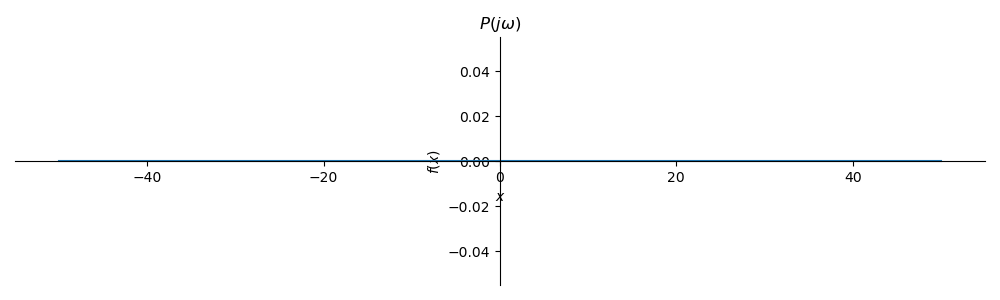

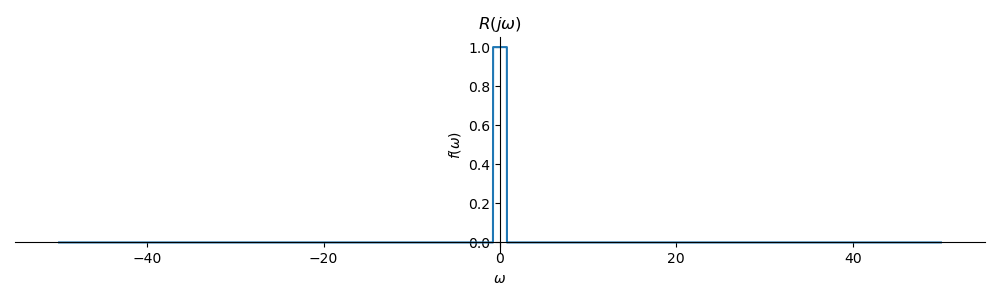

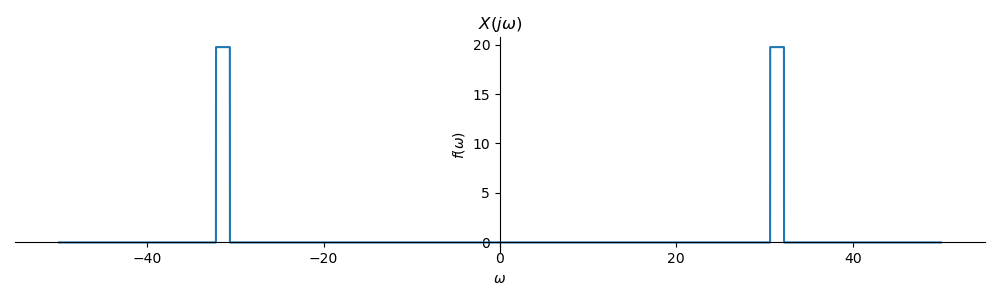

In [16]:

omega = sym.symbols('\omega')
R = sym.Piecewise((1, (omega>-np.pi/4) & (omega<np.pi/4)),
                  (0, True))

X = sym.Piecewise((2*np.pi**2, (omega>-np.pi/4-2*np.pi*5) & (omega<np.pi/4-2*np.pi*5)),
                  (2*np.pi**2, (omega>-np.pi/4+2*np.pi*5) & (omega<np.pi/4+2*np.pi*5)),
                  (0, True))

p1 = sym.plot(0*omega, (omega, -50,50), size=(10,3), title=r'$P(j\omega)$');
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.arrow(2*np.pi*5,0,0,np.pi, width=0.03, head_width = 1, head_length=0.5)
ax.arrow(-2*np.pi*5,0,0,np.pi, width=0.03, head_width = 1, head_length=0.5)
plt.ylim(0, 6)
p2 = sym.plot(R, (omega, -50,50), size=(10,3), title=r'$R(j\omega)$');

p3 = sym.plot(X, (omega, -50,50), size=(10,3), title=r'$X(j\omega)$', nb_of_points= 1000);



Ao multiplicar o sinal sinc pelo cosseno, ocorreu um deslocamento do espectro do sinc para ficar centrado na frequência do cosseno. Esse fenômeno é conhecido como **modulação em amplitude (AM)**.

## Teorema de Parseval

Assim como a série de Fourier, a transformada de Fourier tem uma propriedade equivalente, que diz que a energia de um sinal é igual à integral do quadrado do módulo da sua transformada de Fourier.

$\int_{-\infty}^\infty |x(t)|^2\,dt=\frac{1}{2\pi}\int_{-\infty}^\infty |X(j\omega)|^2\,d\omega$

A sua demonstração fica como exercício.

## Exercícios

**1)** Calcule as transformadas de Fourier dos seguintes sinais:

a) $x_1(t) = \cos(2\pi 3t) + \mathrm{sen}\left(2\pi 3t -\frac{\pi}{4}\right)$

b) $x_2(t) = \cos(2\pi 3t) + \cos(3t)$

c) $x_3(t) = \mathrm{sen}(\sqrt{2}t) + \cos\left(2t-\frac{\pi}{3}\right)$

d) $x_4(t) = \cos\left(2\pi t-\frac{\pi}{3}\right) + \cos\left(\sqrt{3}t-\frac{\pi}{4}\right)$

**2)** Calcule a transfromada de Fourier da convolução entre os dois sinais abaixo:

$x_1(t) = 20\sqrt{3}(e^{j2t} + e^{j4t})$

$x_2(t) = e^{-2t}u(t) - e^{-4t}u(t)$

**3)** Calcule o valor de:

$\int_{-\infty}^\infty t^2\frac{\mathrm{sen}(30t)^4}{(30t)^4}\,dt$

**4)** Prove o teorema de Parseval para transformada de Fourier.

**5)** Calcule o sinal $x(t)$ que deu origem à seguinte transformada de Fourier:

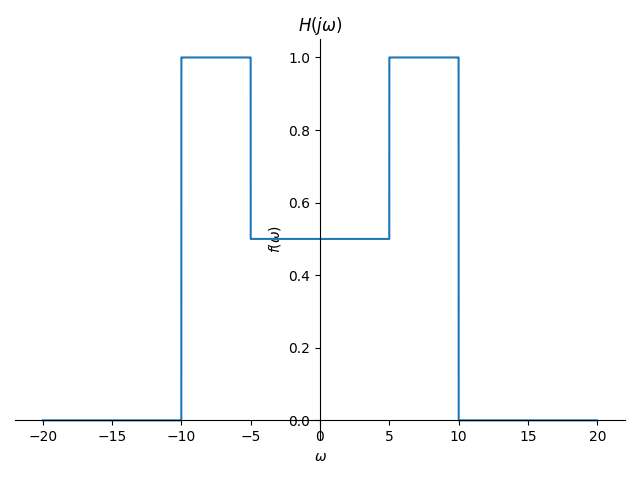

In [4]:
omega = sym.symbols('\omega')
H = sym.Piecewise((1, (omega>-10) & (omega<-5)),
                  (0.5, (omega>-5) & (omega<5)),
                  (1, (omega>5) & (omega<10)),
                 (0, True))
sym.plot(H, (omega, -20, 20), title=r'$H(j\omega)$')

**6)** Um sinal $x(t)$ tem o espectro com o seguinte gráfico (a fase do espectro desse sinal é zero):

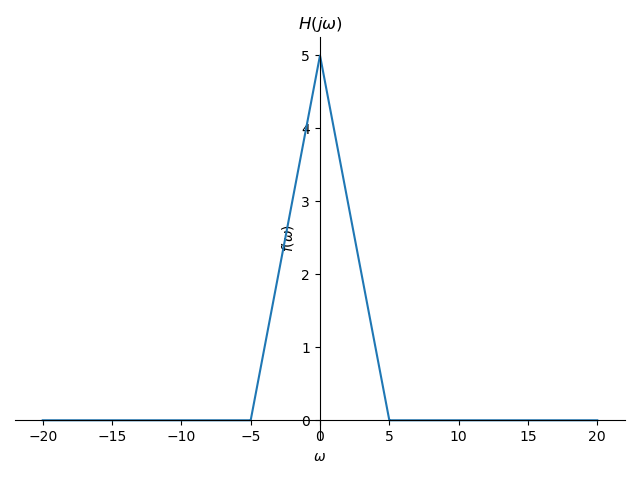

In [18]:
omega = sym.symbols('\omega')
H = sym.Piecewise((-omega+5, (omega>0) & (omega<5)),
                  (omega+5, (omega>-5) & (omega<0)),
                 (0, True))
sym.plot(H, (omega, -20, 20), title=r'$H(j\omega)$')

a) Esse sinal é multiplicado por $m(t) = \cos(15t)$. Qual o espectro do sinal resultante.

b) Agora o mesmo sinal é multiplicado por $m_2(t) = \cos(3t)$. Qual o espectro do sinal resultante?

c) Agora calcule o espectro do sinal resultante da multiplicação de $x(t)$ com um trem de impulsos de período $T = \frac{2\pi}{15}$ s.

d) Agora calcule o espectro do sinal resultante da multiplicação de $x(t)$ com um trem de impulsos de período $T = \frac{2\pi}{3}$ s.

**7)** Calcule a transformada de Fourier dos seguintes sinais abaixo e esboce o gráfico do seu módulo de fase:

a)

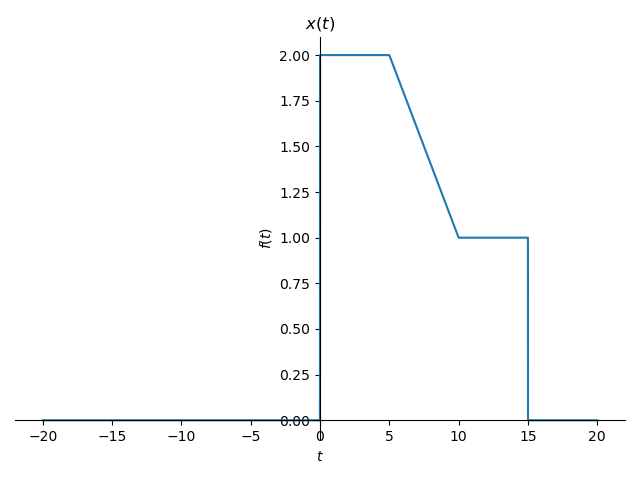

In [19]:
t = sym.symbols('t')
A = 2
T = 15
x = sym.Piecewise((A, (t>0) & (t<T/3)),
                  (-0.2*t+A/2+0.2*T/3+A/2, (t>T/3) & (t<2*T/3)),
                  (A/2, (t>2*T/3) & (t<T)),
                  (0, True))
sym.plot(x, (t, -20, 20), title=r'$x(t)$')

b) $x(t) = e^{-2|t|}$

c) 

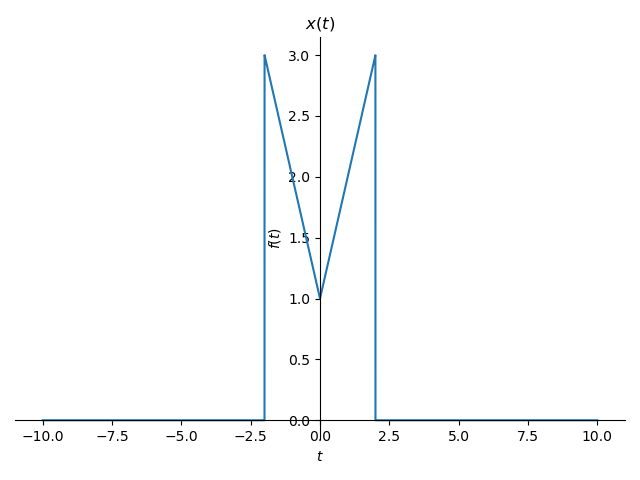

In [20]:
t = sym.symbols('t')
A = 2
T = 15
x = sym.Piecewise((1+t, (t>0) & (t<2)),
                  (1-t, (t>-2) & (t<0)),
                  (0, True))
sym.plot(x, (t, -10, 10), title=r'$x(t)$')

d) $x_4(t) = 2(1-e^{-2t})(u(t)-u(t-2))$

e) $x_5(t) = 2\cos(2\pi t))(u(t+\frac{\pi}{2})-u(t-\frac{\pi}{2}))$

**8)** Considere os seguintes sinais:

$x_1(t) = \mathrm{sinc}(10t)$

$x_2(t) = \mathrm{sinc}(2 t)$

a) Faça o espectro de $x_1(t)+x_2(t)$.

b) Faça agora o espectro de $p(t) = x_1(t)\cos(100t) + x_2(t)\cos(200t)$

c) Faça agora o espectro de $y(t) = p(t)\cos(100t)$

d) Faça o espectro de $y(t)*40\mathrm{sinc}(20t)$. Qual o sinal resultante dessa última operação?

**9)** Prove as propriedades da convolução, multiplicação, atraso, derivada, , escala de tempo e  derivada do espectro para transformada de Fourier.

**10)** Sabe-se que o sinal $x(t)$ tem a seguinte transformada de Fourier:

$X(j\omega) = \frac{5}{2+j\omega}$

Encontre o espectros de:

a) $x(3t-2)$

b) $tx(2t)$

c) $\frac{dx}{dt}$

**11)** Calcule a transformada de Fourier do pulso gaussiano, mostrado abaixo (dica: lembre-se da estatística que $\int_{-\infty}^\infty\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(t-a)^2}{2\sigma^2}}\,dt = 1$ para qualquer $a$, real ou complexo). Esse sinal é muito utilizado em processamento de imagens e aprendizado de máquinas.

$x(t) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-t^2}{2\sigma^2}}$

**12)** Encontre a transformada de Fourier dos sinais abaixo::

a) 

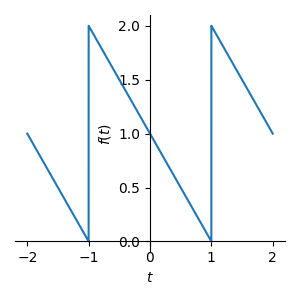

In [13]:
t = sym.symbols('t')
x = sym.Piecewise((-t+1, (t>-1)&(t<1)),
                  (-(t-2)+1, (t>-1)&(t<3)),
                  (-(t+2)+1, (t>-3)&(t<-1)),
                  (0, True))
sym.plot(x, (t, -2,2), size=(3,3));

b)

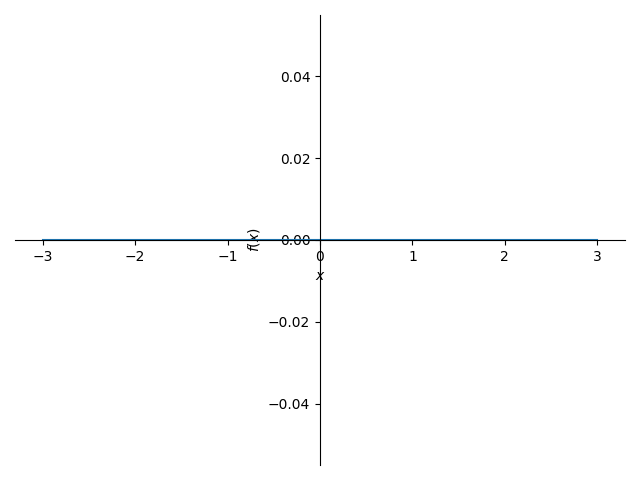

In [14]:
t = sym.symbols('t')
x = sym.Piecewise((0, True))
y = sym.symbols('y')
p1 = sym.plot(x, (t, -3, 3))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_ylabel(r'$\delta(t)$')
ax.set_xlabel(r'$t$')
for i in range(-3,4):
    ax.arrow(i,0,0,1-0.1, width=0.03, head_width = 0.2, head_length=0.1)
fig.canvas.draw_idle()

c)

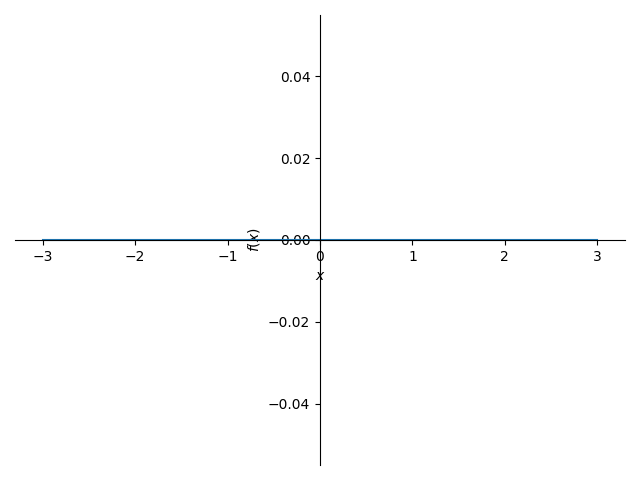

In [15]:
t = sym.symbols('t')
x = sym.Piecewise((0, True))
y = sym.symbols('y')
p1 = sym.plot(x, (t, -3, 3))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_ylabel(r'$x(t)$')
ax.set_xlabel(r'$t$')
for i in range(-3,4):
    ax.arrow(i,0,0,1-0.1, width=0.03, head_width = 0.2, head_length=0.1)
    ax.arrow(i+0.5,0,0,-0.5+0.1, width=0.03, head_width = 0.2, head_length=0.1)
plt.ylim(-1,1)
fig.canvas.draw_idle()


d)

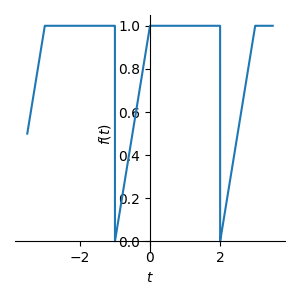

In [29]:
t = sym.symbols('t')
x = sym.Piecewise((t+1, (t>-1)&(t<0)),
                  (1, (t>0)&(t<2)),
                  (1, (t>-3)&(t<-1)),
                  (t+4, (t>-4)&(t<-3)),
                  (t-2, (t>2)&(t<3)),
                  (1, (t>3)))
sym.plot(x, (t, -3.5,3.5), size=(3,3));

**13)** Este problema pretende mostrar como usar transformada de Laplace e transformada de Fourier para resolver equações diferenciais parciais.

Considere a seguir a equação da onda. Ela aparece em vários contextos, como a propagação do ultrassom, geração de ondas eletromagnéticas, oscilações mecânicas, entre muitos outros casos:

$\frac{\partial^2 u(x,t)}{\partial x^2} = k^2frac{\partial^2 u(x,t)}{\partial t^2}$

em que $u(x,t)$ é o sinal da onda, que depende da posição espacial $x$ e do instante $t$.

No instante inicial $u(x,0) = \delta(x)$ e $\frac{\partial u(x,t)}{\partial t^2}(x,0)=0$. Ou seja, é um impulso que acontece na origem. Temos que encontrar a expressão de $u(x,t)$.

a) Faça a transformada de Laplace da equação da onda, considerando a variável independente o tempo $t$. A transformada de Laplace de $u(x,t)$ é $U(x, s)$.

b) Faça a transformada de Fourier da equação resultante do item anterior, considerando a variável independente a posição $x$. A transformada de Fourier de $U(x,s)$ é $U(j\omega, s)$.

c) Encontre a expressão de $U(j\omega, s)$.

d) Faça a transformada de Laplace inversa de $U(j\omega, s)$, para encontrar $U(j\omega, t)$.

e) Agora, faça a transformada de Fourier inversa de $U(j\omega, t)$, para encontrar a expressão de $u(x,t)$. Você deve encontrar dois impulsos que se deslocam para $x$ positivo e para x negativo

f) Resolva o problema agora considerando $u(x,0) = g(x)$ e $\frac{\partial u(x,t)}{\partial t^2}(x,0)=0$. Encontre uma expressão para $u(x,t)$ em função de $g(x)$.



## Referências

- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007
- Papoulis A. , The Fourier Integral and its applications, 1962
- Wiener, N. The Fourier Integral and certain of its applications, 1933
